In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#read & store the data
data = pd.read_csv('real_data.csv', encoding='latin-1')
data.head()

,Location,House_Type,Contractor,Address,Bedrooms,Bathrooms,Toilets,Parking_Space,Price
0,Abuja,Flat,Jes Unique,"Riverpark Estate, Lugbe District, Abuja",NaN,NaN,NaN,NaN,3.000000e+08
1,Abuja,Detached duplex,Kinchozi Enterprise,"Nicon Transcorp Hilton, Asokoro District, Abuja",8.0,8.0,9.0,NaN,1.900000e+09
2,Abuja,Detached duplex,Kinchozi Enterprise,"Naf Valley Estate, Asokoro District, Abuja",5.0,5.0,6.0,NaN,3.500000e+08
3,Abuja,Terraced duplex,Mubdhab Homes Ltd,"Galadimawa, Abuja",3.0,3.0,4.0,NaN,4.500000e+07
4,Abuja,Bungalow,Mubdhab Homes Ltd,"Lokogoma District, Abuja",3.0,3.0,4.0,NaN,3.500000e+07


In [3]:
data.isnull().sum()

Location            0
House_Type          0
Contractor         72
Address             0
Bedrooms           97
Bathrooms         489
Toilets           698
Parking_Space    1837
Price               0
dtype: int64

In [4]:
len(data)

4565

In [5]:
# Drop all rows with any null values and update the dataframe
data.dropna(inplace=True)

# Print the updated dataframe
data.isnull().sum()

Location         0
House_Type       0
Contractor       0
Address          0
Bedrooms         0
Bathrooms        0
Toilets          0
Parking_Space    0
Price            0
dtype: int64

In [6]:
data.head()

,Location,House_Type,Contractor,Address,Bedrooms,Bathrooms,Toilets,Parking_Space,Price
7,Abuja,Terraced duplex,Quid And Stones Ltd,"By Gilmore, Jahi, Abuja",4.0,4.0,5.0,2.0,1.450000e+08
9,Abuja,Detached duplex,Lexxon Nigeria,"Asokoro Main, Asokoro District, Abuja",8.0,9.0,8.0,15.0,1.500000e+09
10,Abuja,Terraced duplex,Ingens Premier,"Jahi, Abuja",4.0,4.0,5.0,3.0,1.000000e+08
11,Abuja,Terraced duplex,Ingens Premier,"Guzape District, Abuja",4.0,4.0,5.0,4.0,6.900000e+07
12,Abuja,Terraced duplex,Ingens Premier,"Jahi, Abuja",4.0,4.0,5.0,4.0,8.900000e+07


In [7]:
length = len(data)

# Print the length of the dataframe
print('Length of the data:', length)

Length of the data: 2680


In [8]:
#encode the categorical data

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode the Location data
data['Location_encoded'] = le.fit_transform(data['Location'])

# Encode the House_Type data
data['House_Type_encoded'] = le.fit_transform(data['House_Type'])

# Encode the Contractor data
data['Contractor_encoded'] = le.fit_transform(data['Contractor'])

data.head()


,Location,House_Type,Contractor,Address,Bedrooms,Bathrooms,Toilets,Parking_Space,Price,Location_encoded,House_Type_encoded,Contractor_encoded
7,Abuja,Terraced duplex,Quid And Stones Ltd,"By Gilmore, Jahi, Abuja",4.0,4.0,5.0,2.0,1.450000e+08,0,9,414
9,Abuja,Detached duplex,Lexxon Nigeria,"Asokoro Main, Asokoro District, Abuja",8.0,9.0,8.0,15.0,1.500000e+09,0,4,290
10,Abuja,Terraced duplex,Ingens Premier,"Jahi, Abuja",4.0,4.0,5.0,3.0,1.000000e+08,0,9,248
11,Abuja,Terraced duplex,Ingens Premier,"Guzape District, Abuja",4.0,4.0,5.0,4.0,6.900000e+07,0,9,248
12,Abuja,Terraced duplex,Ingens Premier,"Jahi, Abuja",4.0,4.0,5.0,4.0,8.900000e+07,0,9,248


In [9]:
data.drop(columns=['Location', 'House_Type', 'Contractor', 'Address'], inplace=True)
data.head()

,Bedrooms,Bathrooms,Toilets,Parking_Space,Price,Location_encoded,House_Type_encoded,Contractor_encoded
7,4.0,4.0,5.0,2.0,1.450000e+08,0,9,414
9,8.0,9.0,8.0,15.0,1.500000e+09,0,4,290
10,4.0,4.0,5.0,3.0,1.000000e+08,0,9,248
11,4.0,4.0,5.0,4.0,6.900000e+07,0,9,248
12,4.0,4.0,5.0,4.0,8.900000e+07,0,9,248


In [10]:
columns_to_convert = ['Price', 'Parking_Space', 'Toilets', 'Bedrooms', 'Bathrooms', 'Location_encoded', 'House_Type_encoded', 'Contractor_encoded']
data[columns_to_convert] = data[columns_to_convert].astype(float)

print(data.dtypes)

Bedrooms              float64
Bathrooms             float64
Toilets               float64
Parking_Space         float64
Price                 float64
Location_encoded      float64
House_Type_encoded    float64
Contractor_encoded    float64
dtype: object


In [11]:
data.corr()

,Bedrooms,Bathrooms,Toilets,Parking_Space,Price,Location_encoded,House_Type_encoded,Contractor_encoded
Bedrooms,1.000000,0.972930,0.150942,0.036870,0.008539,-0.036902,-0.113068,-0.035110
Bathrooms,0.972930,1.000000,0.099881,0.038359,0.010734,-0.056056,-0.106648,-0.027235
Toilets,0.150942,0.099881,1.000000,0.062859,0.001860,-0.044769,-0.024426,0.003739
Parking_Space,0.036870,0.038359,0.062859,1.000000,0.002222,0.006329,-0.056297,0.016624
Price,0.008539,0.010734,0.001860,0.002222,1.000000,-0.003459,0.011439,0.002903
Location_encoded,-0.036902,-0.056056,-0.044769,0.006329,-0.003459,1.000000,-0.218189,-0.252726
House_Type_encoded,-0.113068,-0.106648,-0.024426,-0.056297,0.011439,-0.218189,1.000000,0.182999
Contractor_encoded,-0.035110,-0.027235,0.003739,0.016624,0.002903,-0.252726,0.182999,1.000000


In [12]:
#Show how much feature variables are related to the target variable.

corr_matrix = data.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                 1.000000
House_Type_encoded    0.011439
Bathrooms             0.010734
Bedrooms              0.008539
Contractor_encoded    0.002903
Parking_Space         0.002222
Toilets               0.001860
Location_encoded     -0.003459
Name: Price, dtype: float64

In [13]:
#correlation btw independent variables & dependent variable
data.corr()

,Bedrooms,Bathrooms,Toilets,Parking_Space,Price,Location_encoded,House_Type_encoded,Contractor_encoded
Bedrooms,1.000000,0.972930,0.150942,0.036870,0.008539,-0.036902,-0.113068,-0.035110
Bathrooms,0.972930,1.000000,0.099881,0.038359,0.010734,-0.056056,-0.106648,-0.027235
Toilets,0.150942,0.099881,1.000000,0.062859,0.001860,-0.044769,-0.024426,0.003739
Parking_Space,0.036870,0.038359,0.062859,1.000000,0.002222,0.006329,-0.056297,0.016624
Price,0.008539,0.010734,0.001860,0.002222,1.000000,-0.003459,0.011439,0.002903
Location_encoded,-0.036902,-0.056056,-0.044769,0.006329,-0.003459,1.000000,-0.218189,-0.252726
House_Type_encoded,-0.113068,-0.106648,-0.024426,-0.056297,0.011439,-0.218189,1.000000,0.182999
Contractor_encoded,-0.035110,-0.027235,0.003739,0.016624,0.002903,-0.252726,0.182999,1.000000


In [14]:
#Show how much feature variables are related to the target variable.

corr_matrix = data.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                 1.000000
House_Type_encoded    0.011439
Bathrooms             0.010734
Bedrooms              0.008539
Contractor_encoded    0.002903
Parking_Space         0.002222
Toilets               0.001860
Location_encoded     -0.003459
Name: Price, dtype: float64

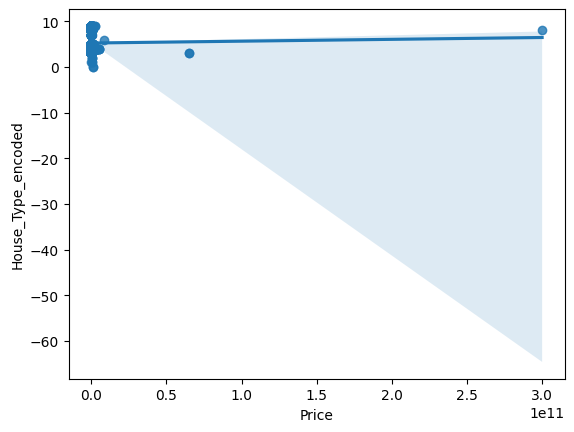

In [15]:
#correlation btw individual independent variables
sns.regplot(x=data.Price, y=data.House_Type_encoded)
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2680 entries, 7 to 4564
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bedrooms            2680 non-null   float64
 1   Bathrooms           2680 non-null   float64
 2   Toilets             2680 non-null   float64
 3   Parking_Space       2680 non-null   float64
 4   Price               2680 non-null   float64
 5   Location_encoded    2680 non-null   float64
 6   House_Type_encoded  2680 non-null   float64
 7   Contractor_encoded  2680 non-null   float64
dtypes: float64(8)
memory usage: 188.4 KB


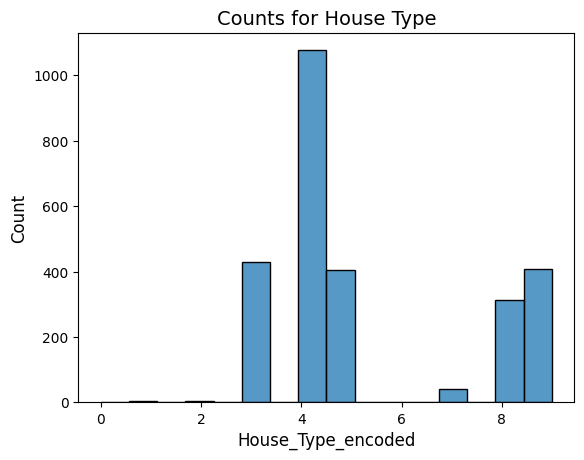

In [17]:
sns.histplot(data['House_Type_encoded'], kde=False)
plt.xlabel('House_Type_encoded', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for House Type', fontsize=14)
plt.show()

In [18]:
#describe the dataset
data.describe()

,Bedrooms,Bathrooms,Toilets,Parking_Space,Price,Location_encoded,House_Type_encoded,Contractor_encoded
count,2680.000000,2680.000000,2680.000000,2680.000000,2.680000e+03,2680.000000,2680.000000,2680.000000
mean,4.586567,4.792910,8.128731,73.654478,3.468465e+08,7.246269,5.256716,229.966791
std,4.802012,4.969863,49.034701,497.508526,6.071491e+09,3.785567,2.137786,155.264131
min,1.000000,1.000000,1.000000,1.000000,3.000000e+06,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,3.000000,4.500000e+07,7.000000,4.000000,80.000000
50%,4.000000,4.000000,5.000000,5.000000,8.000000e+07,7.000000,4.000000,210.000000
75%,5.000000,5.000000,6.000000,8.000000,1.600000e+08,11.000000,8.000000,350.000000
max,154.000000,157.000000,1300.000000,21500.000000,3.000000e+11,12.000000,9.000000,540.000000


<AxesSubplot: xlabel='Location_encoded', ylabel='Location_encoded'>

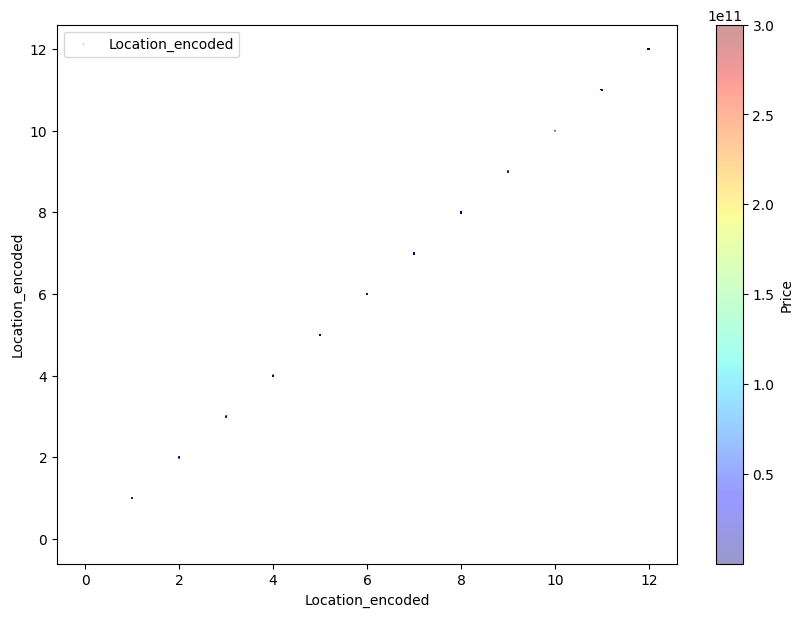

In [19]:
#Visualize housing prices by population in area.

# The circle represents population and color represents prices.

# Assuming you have a DataFrame called 'houses' with columns 'sqft_lot15', 'zipcode', and 'median_house_value'
data.plot(kind="scatter", x="Location_encoded", y="Location_encoded", alpha=0.4,
          s=data["Location_encoded"] / 100, label="Location_encoded", figsize=(10, 7),
          c="Price", cmap="jet", colorbar=True, sharex=False)



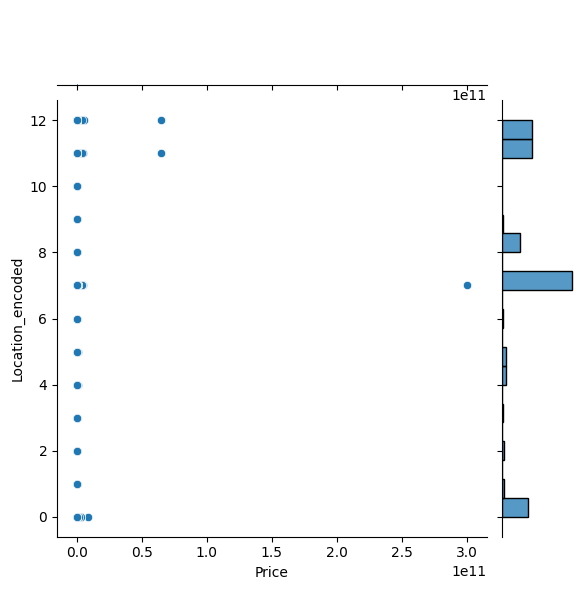

In [20]:
#visualize the realtionship between price & sqft living

sns.jointplot(x="Price", y="Location_encoded", data=data)

<AxesSubplot: >

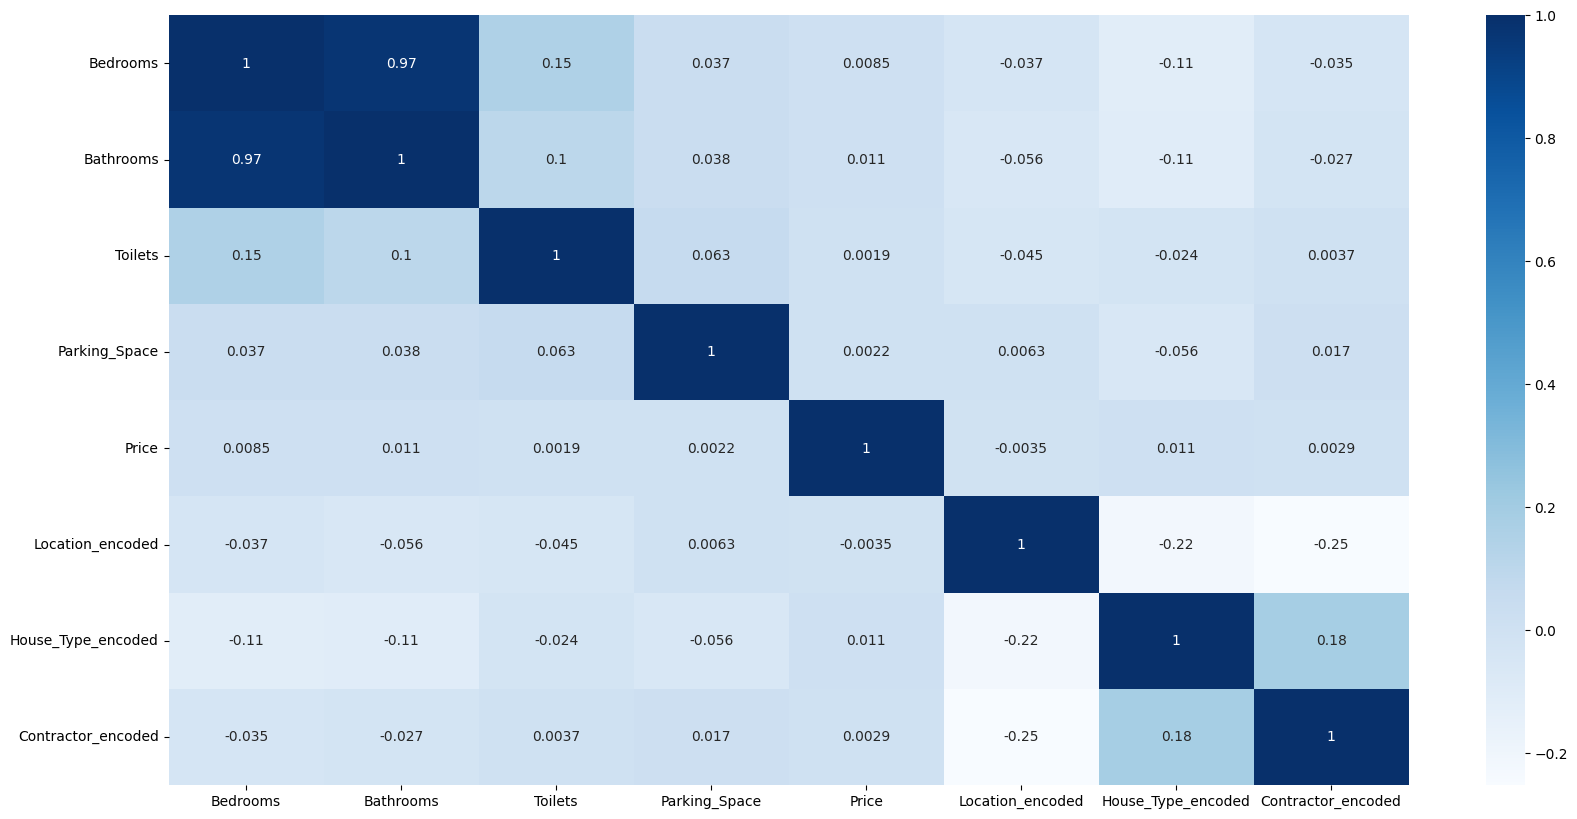

In [21]:
#Visualize correlations between all features and the target variable.

# We will use the Pearson Correlation method.
corr = data.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True, cmap = 'Blues')

Bedrooms              0
Bathrooms             0
Toilets               0
Parking_Space         0
Price                 0
Location_encoded      0
House_Type_encoded    0
Contractor_encoded    0
dtype: int64

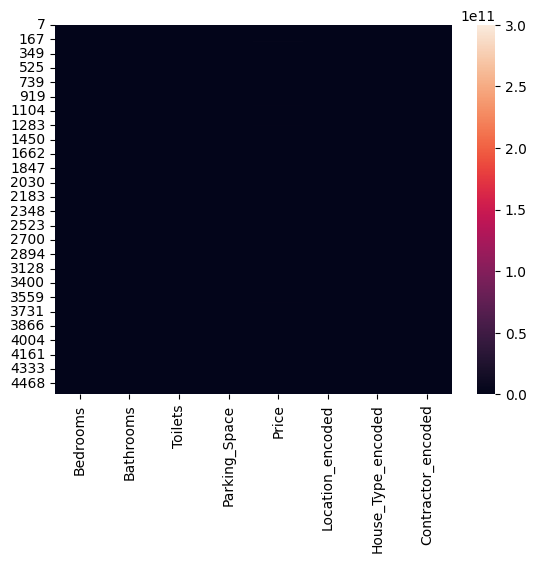

In [22]:
sns.heatmap(data)
data.isnull().sum()

Splitting & Training Model

In [23]:
X = data.drop('Price', axis=1)
Y = data['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 25)

In [24]:
x = np.array(X_test)
y = np.array(Y_test)
x.shape, y.shape

((25, 7), (25,))

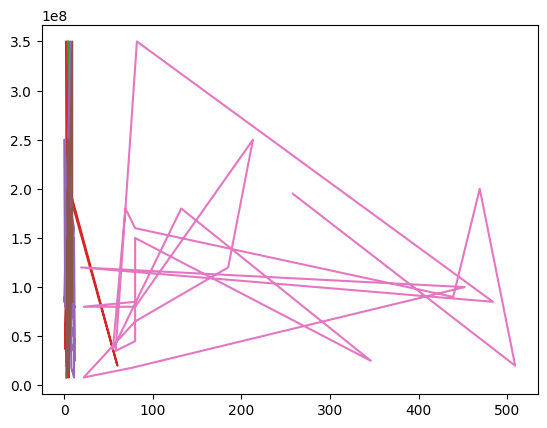

In [25]:
plt.plot(x, y)
plt.show()

In [26]:
model = LinearRegression()
model.fit(X_test, Y_test)

LinearRegression()

In [27]:
#model performance evaluation
predictions = model.predict(X_test)

In [28]:
predictions

array([1.62250105e+08, 1.19315393e+08, 8.43026318e+07, 1.73429281e+08,
       1.29276126e+08, 1.21333531e+08, 2.63283438e+06, 1.47540778e+08,
       1.28407061e+08, 1.52202979e+08, 1.77221868e+08, 1.75374949e+08,
       1.72712570e+07, 6.47718063e+07, 1.15274590e+08, 1.21333531e+08,
       7.42349326e+05, 1.16910791e+08, 5.06437976e+07, 1.63254766e+08,
       1.34777690e+08, 1.13471409e+08, 1.49432801e+08, 1.78853377e+07,
       1.25942337e+08])

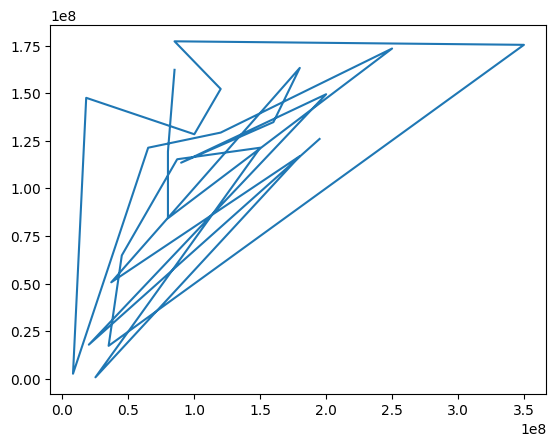

In [29]:
plt.plot(np.array(Y_test), np.array(predictions))
plt.show()

In [30]:
loss = np.sqrt(metrics.mean_absolute_error(Y_test, predictions))

In [31]:
loss

6657.399345784808

In [32]:
#model performance evaluation
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 3607440374581774.0
Mean Absolute Error (MAE): 44320966.049256
R-squared (R2): 0.44361221180228294
